In [681]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [682]:
# Carregar o arquivo CSV
df = pd.read_csv('C:/Users/gabrielbrito/FIAP/Curso/FIAP/TechChallenge/Fase 03/preco_petroleo_brent.csv')

# Verificar as primeiras linhas dos dados
print(df.head())

# Verificar a estrutura dos dados
print(df.info())

# Verificar estatísticas descritivas
print(df.describe())

# Verificar se há valores ausentes
print(df.isnull().sum())

# Converter a coluna de data para o formato datetime (se necessário)#
df['Data'] = pd.to_datetime(df['Data'], format='%d/%m/%Y')

         Data  Preço - petróleo bruto - Brent (FOB)
0  04/11/2024                                  7489
1  01/11/2024                                  7363
2  31/10/2024                                  7325
3  30/10/2024                                  7321
4  29/10/2024                                  7109
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11292 entries, 0 to 11291
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Data                                  11292 non-null  object
 1   Preço - petróleo bruto - Brent (FOB)  11292 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 176.6+ KB
None
       Preço - petróleo bruto - Brent (FOB)
count                          11292.000000
mean                            5331.194828
std                             3316.466889
min                              910.000000
25%                             2061.00

In [683]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11292 entries, 0 to 11291
Data columns (total 2 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Data                                  11292 non-null  datetime64[ns]
 1   Preço - petróleo bruto - Brent (FOB)  11292 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 176.6 KB


In [684]:
df.head()

,Data,Preço - petróleo bruto - Brent (FOB)
0,2024-11-04,7489
1,2024-11-01,7363
2,2024-10-31,7325
3,2024-10-30,7321
4,2024-10-29,7109


In [685]:
#Filtrando df para pegar dados a partir de 2005

df = df[df['Data'].dt.year>=2005]

In [686]:
df.head()

,Data,Preço - petróleo bruto - Brent (FOB)
0,2024-11-04,7489
1,2024-11-01,7363
2,2024-10-31,7325
3,2024-10-30,7321
4,2024-10-29,7109


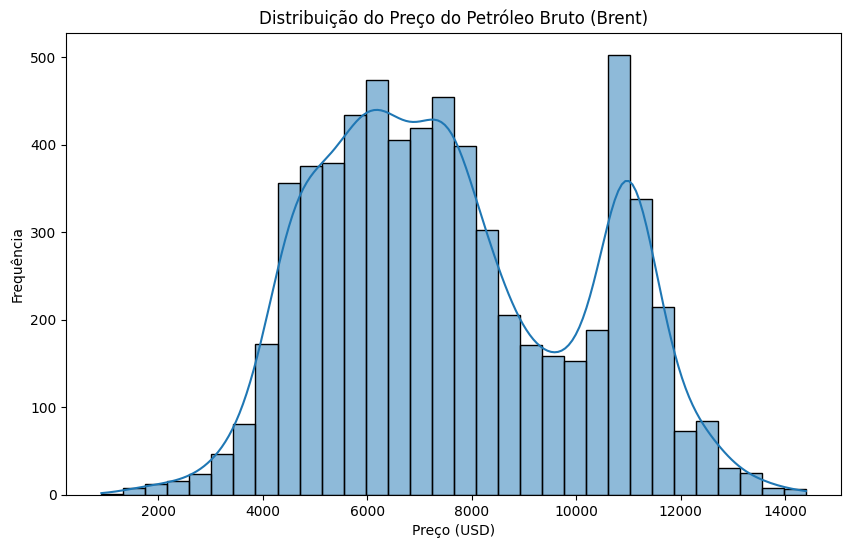

In [687]:
# Verificar a distribuição do preço do petróleo
plt.figure(figsize=(10, 6))
sns.histplot(df['Preço - petróleo bruto - Brent (FOB)'], kde=True)
plt.title('Distribuição do Preço do Petróleo Bruto (Brent)')
plt.xlabel('Preço (USD)')
plt.ylabel('Frequência')
plt.show()

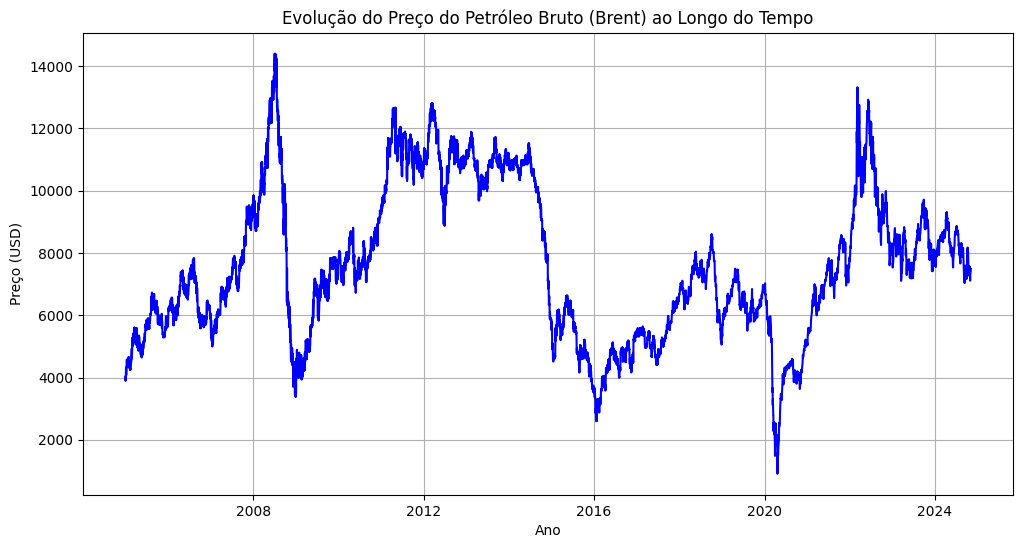

In [688]:
# Análise temporal - Evolução do preço do petróleo ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Preço - petróleo bruto - Brent (FOB)'], color='b')
plt.title('Evolução do Preço do Petróleo Bruto (Brent) ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Preço (USD)')
plt.grid(True)
plt.show()

## Possíveis eventos que ocasionaram mudanças nos preços 
 - Crises econômicas como a de 2008.
 - Conflitos geopolíticos, como a Guerra do Golfo ou disputas no Oriente Médio.
 - Mudanças significativas na oferta de energia, como as mudanças nos preços após o aumento da produção nos EUA ou decisões da OPEC.
 - Pandemia

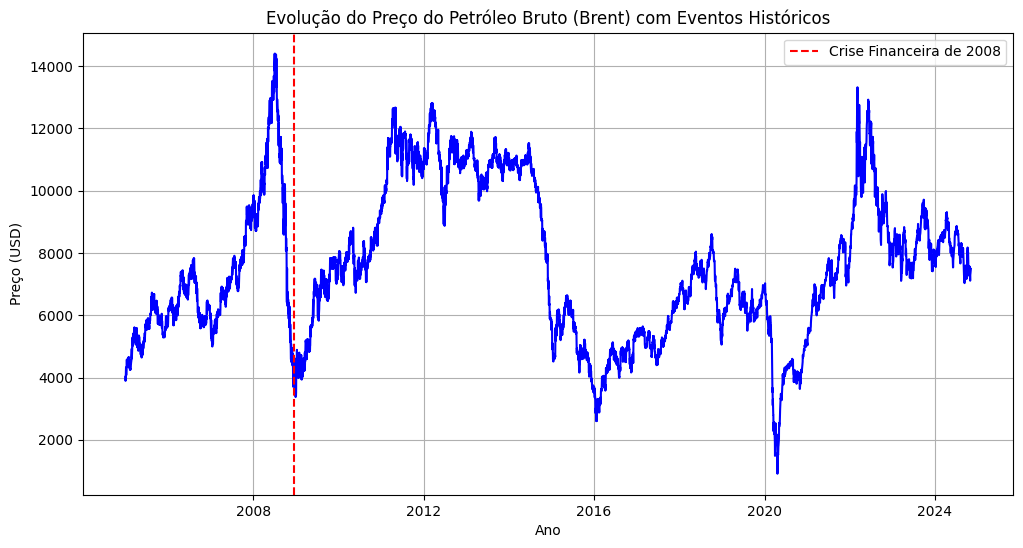

In [724]:
# Exemplo de anotação para eventos históricos
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Preço - petróleo bruto - Brent (FOB)'], color='b')
plt.axvline(pd.to_datetime('2008-12-15'), color='r', linestyle='--', label="Crise Financeira de 2008")
plt.title('Evolução do Preço do Petróleo Bruto (Brent) com Eventos Históricos')
plt.xlabel('Ano')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()


No início de 2016, o preço do barril de petróleo caiu para US\$ 30, o menor valor desde 2004.
A queda foi causada por diversos fatores, como:
Aumento inesperado dos estoques de gasolina nos Estados Unidos 
Tensões geopolíticas após a Coreia do Norte anunciar um teste de bomba de hidrogênio 
Previsão de menor demanda da Europa e da Ásia devido ao menor crescimento da economia mundial 

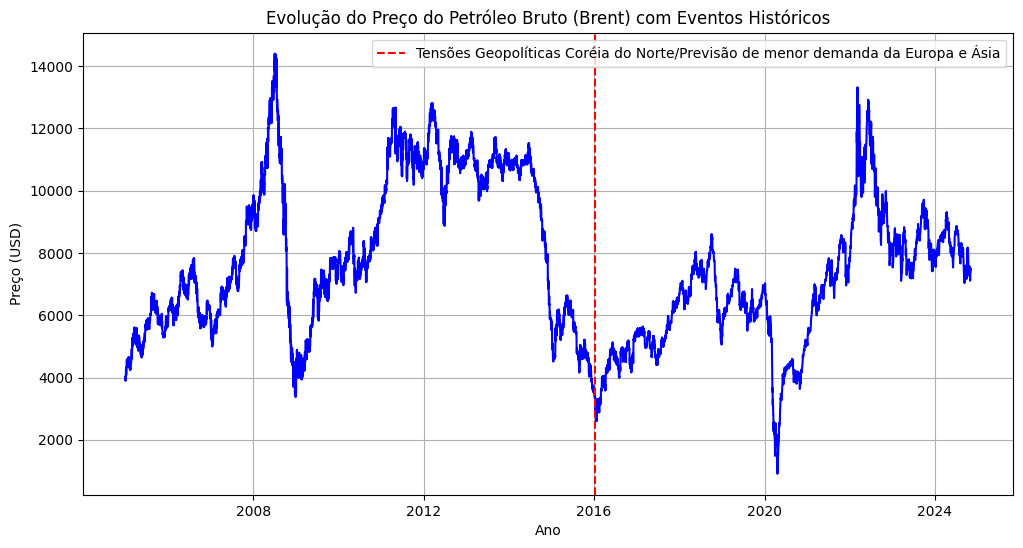

In [723]:
# Adicionar uma linha vertical para a Pandemia de 2020
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Preço - petróleo bruto - Brent (FOB)'], color='b')
plt.axvline(pd.to_datetime('2016-01-11'), color='r', linestyle='--', label="Tensões Geopolíticas Coréia do Norte/Previsão de menor demanda da Europa e Ásia")
plt.title('Evolução do Preço do Petróleo Bruto (Brent) com Eventos Históricos')
plt.xlabel('Ano')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

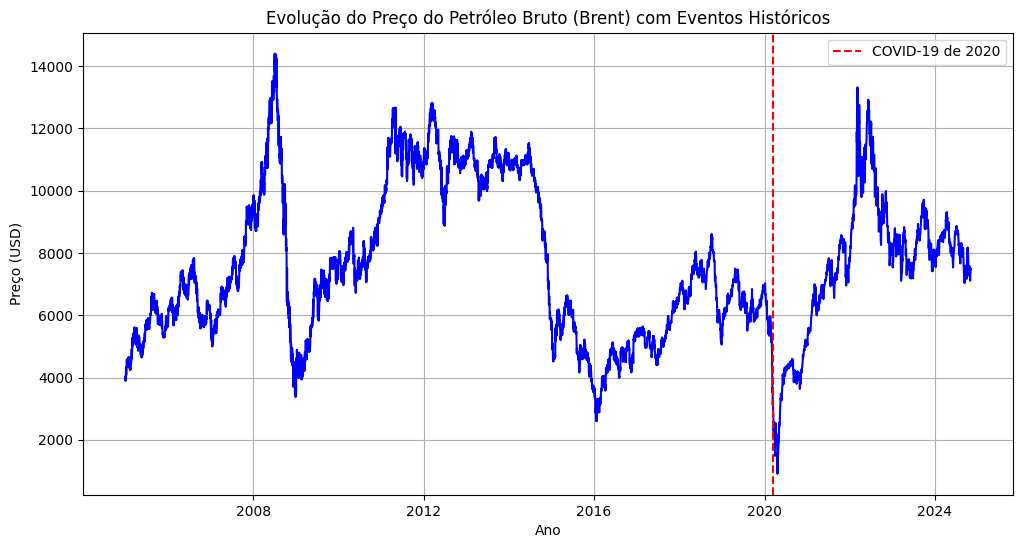

In [726]:
# Adicionar uma linha vertical para a Pandemia de 2020
plt.figure(figsize=(12, 6))
plt.plot(df['Data'], df['Preço - petróleo bruto - Brent (FOB)'], color='b')
plt.axvline(pd.to_datetime('2020-03-11'), color='r', linestyle='--', label="COVID-19 de 2020")
plt.title('Evolução do Preço do Petróleo Bruto (Brent) com Eventos Históricos')
plt.xlabel('Ano')
plt.ylabel('Preço (USD)')
plt.legend()
plt.grid(True)
plt.show()

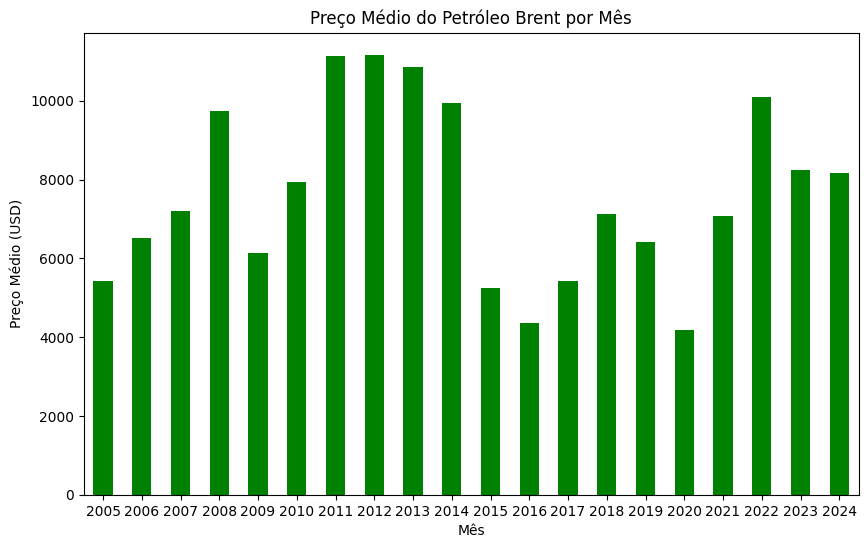

In [691]:
# Extração do ano para análise sazonal
df['Ano'] = df['Data'].dt.year

# Média de preço por mês
media_mensal = df.groupby('Ano')['Preço - petróleo bruto - Brent (FOB)'].mean()

# Gráfico de sazonalidade (média mensal)
plt.figure(figsize=(10, 6))
media_mensal.plot(kind='bar', color='green')
plt.title('Preço Médio do Petróleo Brent por Mês')
plt.xlabel('Mês')
plt.ylabel('Preço Médio (USD)')
plt.xticks(rotation=0)
plt.show()


 ## Desenvolvimento do Modelo de Machine Learning (Previsão de Preços)

In [692]:
#Pegando dados a partir de 2019 para usar no modelo de predição
df_modelo = df[df['Data'].dt.year>=2019].sort_values(by='Data', ascending=True).reset_index()

In [693]:
df_modelo.shape

(1497, 4)

In [694]:
df_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 4 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   index                                 1497 non-null   int64         
 1   Data                                  1497 non-null   datetime64[ns]
 2   Preço - petróleo bruto - Brent (FOB)  1497 non-null   int64         
 3   Ano                                   1497 non-null   int32         
dtypes: datetime64[ns](1), int32(1), int64(2)
memory usage: 41.1 KB


In [695]:
df_modelo.head()

,index,Data,Preço - petróleo bruto - Brent (FOB),Ano
0,1496,2019-01-02,5406,2019
1,1495,2019-01-03,5406,2019
2,1494,2019-01-04,5323,2019
3,1493,2019-01-05,5564,2019
4,1492,2019-01-07,5710,2019


In [696]:
# Preparação dos dados para o modelo
df_modelo = df_modelo[['Data', 'Preço - petróleo bruto - Brent (FOB)']].rename(columns={'Data': 'ds', 'Preço - petróleo bruto - Brent (FOB)': 'y'})
df_modelo.head()


,ds,y
0,2019-01-02,5406
1,2019-01-03,5406
2,2019-01-04,5323
3,2019-01-05,5564
4,2019-01-07,5710


In [697]:
df_modelo.shape

(1497, 2)

In [698]:
df_modelo 

,ds,y
0,2019-01-02,5406
1,2019-01-03,5406
2,2019-01-04,5323
3,2019-01-05,5564
4,2019-01-07,5710
...,...,...
1492,2024-10-29,7109
1493,2024-10-30,7321
1494,2024-10-31,7325
1495,2024-11-01,7363


## SEPARANDO BASE EM TREINO E TESTE

In [699]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_modelo['ds'][:1197]
df_treino['y'] = df_modelo['y'][:1197]

In [700]:
df_treino

,ds,y
0,2019-01-02,5406
1,2019-01-03,5406
2,2019-01-04,5323
3,2019-01-05,5564
4,2019-01-07,5710
...,...,...
1192,2023-08-17,8524
1193,2023-08-18,8592
1194,2023-08-21,8544
1195,2023-08-22,8470


In [701]:
df_teste = pd.DataFrame()
df_teste['ds'] = df_modelo['ds'][1197:]
df_teste['y'] = df_modelo['y'][1197:]

In [702]:
df_teste

,ds,y
1197,2023-08-24,8407
1198,2023-08-25,8542
1199,2023-08-29,8637
1200,2023-08-30,8662
1201,2023-08-31,8729
...,...,...
1492,2024-10-29,7109
1493,2024-10-30,7321
1494,2024-10-31,7325
1495,2024-11-01,7363


### Função para Modelo Arima

In [703]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

def arima_model(train, test):
    # Ajuste do modelo ARIMA
    model = ARIMA(train, order=(5, 1, 0))
    model_fit = model.fit()

    # Previsões
    predictions = model_fit.forecast(steps=len(test))

    # Avaliação
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse, predictions


In [704]:
#Setando data como Indice
df_treino.set_index('ds', inplace=True)
df_teste.set_index('ds', inplace=True)

In [705]:
arima_model(df_treino, df_teste)

c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarnin

(600.5001681294812,
 1197    8396.032629
 1198    8397.312902
 1199    8397.699377
 1200    8397.854633
 1201    8401.675041
            ...     
 1492    8401.371742
 1493    8401.371742
 1494    8401.371742
 1495    8401.371742
 1496    8401.371742
 Name: predicted_mean, Length: 300, dtype: float64)

### Função para modelo SARIMA

In [706]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

def sarima_model(train, test):
    # Ajuste do modelo SARIMA
    model = SARIMAX(train, order=(5, 1, 0), seasonal_order=(1, 1, 1, 12))  # Exemplo de sazonalidade
    model_fit = model.fit(disp=False)

    # Previsões
    predictions = model_fit.forecast(steps=len(test))

    # Avaliação
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse, predictions


In [707]:
sarima_model(df_treino, df_teste)

c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported

(888.925280682455,
 1197    8392.610515
 1198    8361.849115
 1199    8368.389638
 1200    8412.489688
 1201    8412.283116
            ...     
 1492    9183.293185
 1493    9163.718713
 1494    9176.284983
 1495    9183.510466
 1496    9193.468126
 Name: predicted_mean, Length: 300, dtype: float64)

### Modelo RandomForest

In [708]:
from sklearn.ensemble import RandomForestRegressor

def random_forest_model(train, test):
    # Usar o preço do petróleo anterior para prever o próximo valor
    X_train = train[:-1].values
    y_train = train[1:].values

    # Ajustar o modelo
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)

    # Previsões
    X_test = test[:-1].values
    predictions = rf.predict(X_test)

    # Avaliação
    rmse = np.sqrt(mean_squared_error(test[1:], predictions))
    return rmse, predictions

In [709]:
random_forest_model(df_treino, df_teste)

c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


(200.60546362741934,
 array([8397.3       , 8489.9       , 8543.29166667, 8679.88066667,
        8640.48      , 8770.14      , 9081.87866667, 9261.85      ,
        9029.686     , 9206.87      , 9251.5       , 9387.97      ,
        9477.89      , 9355.79      , 9841.23      , 9554.145     ,
        9551.715     , 9362.83      , 9409.96      , 9397.28      ,
        9403.34      , 9445.79      , 9565.33      , 9341.14      ,
        9783.19833333, 9067.356     , 9445.79      , 8995.141     ,
        8722.41      , 8832.1       , 9108.312     , 9167.93      ,
        8803.95      , 8814.64      , 9450.06      , 8926.2       ,
        9114.93      , 9251.5       , 9445.19      , 9409.96      ,
        9203.15      , 8921.65      , 8973.56      , 8825.44      ,
        9177.74      , 9177.74      , 8640.59      , 8250.54466667,
        8239.64      , 8081.81      , 8401.35125   , 8391.27      ,
        8338.04      , 8224.99733333, 7511.444     , 8139.52      ,
        8482.294     , 8254

## Função para testar todos os modelos

In [710]:
def test_models(train, test):
    models = {
        'ARIMA': arima_model,
        'SARIMA': sarima_model,
        'RandomForest': random_forest_model
    }
    
    results = {}
    
    for model_name, model_func in models.items():
        print(f"Treinando e testando o modelo {model_name}...")
        rmse, predictions = model_func(train, test)
        results[model_name] = {
            'RMSE': rmse,
            'Predictions': predictions
        }
    
    return results


In [711]:
results = test_models(df_treino, df_teste)

# Exibir os resultados
for model_name, result in results.items():
    print(f"{model_name} - RMSE: {result['RMSE']}")


Treinando e testando o modelo ARIMA...
Treinando e testando o modelo SARIMA...


c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarnin

Treinando e testando o modelo RandomForest...
ARIMA - RMSE: 600.5001681294812
SARIMA - RMSE: 888.925280682455
RandomForest - RMSE: 201.65730285735512


O melhor resultado foi o RandomForest

### Função retornando somente as Previsões pelo RandomForest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Função para treinar o modelo e fazer previsões
def random_forest_model(train, test):
    X_train = train[:-1].values  # Usando todos os dados, exceto o último
    y_train = train[1:].values   # Variável alvo: todos os dados, exceto o primeiro (valores seguintes)

    # Ajustar o modelo
    rf = RandomForestRegressor(n_estimators=100)
    rf.fit(X_train, y_train)

    # Gerar previsões para o conjunto de teste
    X_test = test[:-1].values  # Usando dados de teste
    predictions = rf.predict(X_test)  # Previsões feitas pelo modelo
    
    return predictions

# Gerar as previsões com os dados de treino e teste
predictions = random_forest_model(df_treino, df_teste)


c:\Users\gabrielbrito\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [720]:
import joblib
from sklearn.ensemble import RandomForestRegressor

# Função para treinar o modelo RandomForest e salvar
def treinar_random_forest_model(df_treino):
    # Preparação dos dados: cria a coluna 'preco_passado' com o valor anterior de 'y'
    df_treino['preco_passado'] = df_treino['y'].shift(1)
    df_treino.dropna(inplace=True)  # Remove linhas com valores nulos gerados pelo shift

    # Separando as variáveis de entrada e saída
    X_train = df_treino[['preco_passado']].values  # Matriz de entrada (preço passado)
    y_train = df_treino['y'].values  # Alvo de previsão (preço atual)

    # Ajuste do modelo
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Salvar o modelo ajustado
    joblib.dump(rf, 'modelo_randomforest.pkl')
    return rf

# Chame a função para treinar e salvar o modelo
modelo = treinar_random_forest_model(df_treino)


In [721]:
df_treino

,y,preco_passado
ds,,
2019-01-04,5323,5406.0
2019-01-05,5564,5323.0
2019-01-07,5710,5564.0
2019-01-08,5710,5710.0
2019-01-09,5691,5710.0
...,...,...
2023-08-17,8524,8449.0
2023-08-18,8592,8524.0
2023-08-21,8544,8592.0


### Criando Função para compar os valores

In [ ]:
def create_comparison_table(df_teste, predictions):
    # Criar DataFrame com as previsões e os valores reais
    df_comparacao = pd.DataFrame({
        'Data': df_teste.index[1:],  # Pegando as datas reais (ignorando o primeiro valor)
        'Valor Real': df_teste[1:].values.flatten(),  # Valores reais
        'Valor Previsto': predictions.flatten()  # Previsões do modelo
    })
    return df_comparacao

# Gerar tabela de comparação para o conjunto de teste
df_comparacao = create_comparison_table(df_teste, predictions)

# Exibir as primeiras linhas
print(df_comparacao.head())

        Data  Valor Real  Valor Previsto
0 2023-08-25        8542     8402.290000
1 2023-08-29        8637     8492.170000
2 2023-08-30        8662     8554.570000
3 2023-08-31        8729     8672.258286
4 2023-09-04        9042     8639.180000


In [ ]:
df_comparacao

,Data,Valor Real,Valor Previsto
0,2023-08-25,8542,8402.290000
1,2023-08-29,8637,8492.170000
2,2023-08-30,8662,8554.570000
3,2023-08-31,8729,8672.258286
4,2023-09-04,9042,8639.180000
...,...,...,...
294,2024-10-29,7109,7327.252500
295,2024-10-30,7321,7077.636667
296,2024-10-31,7325,7247.360000
297,2024-11-01,7363,7160.903333


## OBTENDO % RMSE

In [ ]:

mse = mean_squared_error(df_comparacao['Valor Real'], df_comparacao['Valor Previsto'])
rmse = np.sqrt(mse)
media_y = df_comparacao['Valor Real'].mean()
porcentagem_rmse = (rmse / media_y) * 100

porcentagem_rmse

2.4333230501475764

A porcentagem ficou muito boa, porcentagens de RMSE de 0-5% demonstram Excelente desempenho.